# Harold V. Veleña

# BSIT - 3A

<hr>

# Importing the neccesary Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
pip install folium

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
Chicago_Crimes = pd.read_csv("Chicago_Crimes.csv")
Chicago_Crimes

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,13439321,JH237424,04/14/2024 12:00:00 AM,040XX S PRAIRIE AVE,0890,THEFT,FROM BUILDING,APARTMENT,False,False,...,3,38.0,06,1178707.0,1878256.0,2024,12/21/2024 03:40:46 PM,41.821236,-87.619921,"(41.821236024, -87.619920712)"
1,13437420,JH234779,04/14/2024 12:00:00 AM,023XX W CERMAK RD,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,COMMERCIAL / BUSINESS OFFICE,False,False,...,25,31.0,26,1161210.0,1889347.0,2024,12/21/2024 03:40:46 PM,41.852052,-87.683801,"(41.852051675, -87.683800849)"
2,13428676,JH224478,04/14/2024 12:00:00 AM,043XX W LE MOYNE ST,0917,MOTOR VEHICLE THEFT,"CYCLE, SCOOTER, BIKE WITH VIN",STREET,False,False,...,36,23.0,07,1146960.0,1909501.0,2024,12/21/2024 03:40:46 PM,41.907640,-87.735587,"(41.907640473, -87.735587478)"
3,13429357,JH225293,04/14/2024 12:00:00 AM,039XX W ADAMS ST,143A,WEAPONS VIOLATION,UNLAWFUL POSSESSION - HANDGUN,STREET,True,False,...,28,26.0,15,1150158.0,1898721.0,2024,12/21/2024 03:40:46 PM,41.877997,-87.724121,"(41.877997275, -87.724120826)"
4,13430098,JH226395,04/14/2024 12:00:00 AM,011XX W 112TH PL,0890,THEFT,FROM BUILDING,RESIDENCE,False,False,...,21,75.0,06,1170856.0,1830157.0,2024,12/21/2024 03:40:46 PM,41.689421,-87.650123,"(41.6894214, -87.650123247)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249118,13805239,JJ217509,04/12/2025 12:00:00 AM,029XX W LOGAN BLVD,2826,OTHER OFFENSE,HARASSMENT BY ELECTRONIC MEANS,APARTMENT,False,False,...,1,22.0,26,1156478.0,1917149.0,2025,04/19/2025 03:41:24 PM,41.928440,-87.700416,"(41.928439867, -87.700415972)"
249119,13804023,JJ215813,04/12/2025 12:00:00 AM,094XX S HARVARD AVE,0430,BATTERY,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,False,False,...,9,49.0,04B,1175694.0,1842631.0,2025,04/19/2025 03:41:24 PM,41.723545,-87.632040,"(41.723545182, -87.632039508)"
249120,13803926,JJ215943,04/12/2025 12:00:00 AM,084XX S VINCENNES AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,...,21,71.0,08B,1173850.0,1848976.0,2025,04/19/2025 03:41:24 PM,41.740998,-87.638606,"(41.74099774, -87.638606337)"
249121,13803475,JJ215338,04/12/2025 12:00:00 AM,050XX S ABERDEEN ST,0530,ASSAULT,AGGRAVATED - OTHER DANGEROUS WEAPON,STREET,True,False,...,20,61.0,04A,1169838.0,1871348.0,2025,04/19/2025 03:41:24 PM,41.802477,-87.652657,"(41.802477219, -87.652657244)"


In [5]:
Chicago_Crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    249123 non-null  int64  
 1   Case Number           249123 non-null  object 
 2   Date                  249123 non-null  object 
 3   Block                 249123 non-null  object 
 4   IUCR                  249123 non-null  object 
 5   Primary Type          249123 non-null  object 
 6   Description           249123 non-null  object 
 7   Location Description  248266 non-null  object 
 8   Arrest                249123 non-null  bool   
 9   Domestic              249123 non-null  bool   
 10  Beat                  249123 non-null  int64  
 11  District              249123 non-null  int64  
 12  Ward                  249123 non-null  int64  
 13  Community Area        249120 non-null  float64
 14  FBI Code              249123 non-null  object 
 15  

In [6]:
Chicago_Crimes.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,2.491230e+05,249123.000000,249123.000000,249123.000000,249120.000000,2.490330e+05,2.490330e+05,249123.000000,249033.000000,249033.000000
mean,1.358652e+07,1153.845634,11.308924,23.186823,36.238560,1.165309e+06,1.887602e+06,2024.241668,41.847162,-87.668845
std,6.473192e+05,707.959752,7.074807,13.925951,21.567485,1.616814e+04,3.146277e+04,0.428095,0.086517,0.058875
min,2.807300e+04,111.000000,1.000000,1.000000,1.000000,1.092647e+06,1.813897e+06,2024.000000,41.644590,-87.934567
25%,1.352322e+07,533.000000,5.000000,10.000000,22.000000,1.153981e+06,1.860560e+06,2024.000000,41.772706,-87.710071
50%,1.361560e+07,1034.000000,10.000000,23.000000,32.000000,1.167190e+06,1.894278e+06,2024.000000,41.865616,-87.661690
75%,1.370865e+07,1732.000000,17.000000,34.000000,53.000000,1.176662e+06,1.910282e+06,2024.000000,41.909711,-87.627233
max,1.381045e+07,2535.000000,31.000000,50.000000,77.000000,1.205119e+06,1.951517e+06,2025.000000,42.022559,-87.524531


<hr>
<h1>Checking for Null Values</h1>

In [7]:
Chicago_Crimes.isnull().sum()

ID                        0
Case Number               0
Date                      0
Block                     0
IUCR                      0
Primary Type              0
Description               0
Location Description    857
Arrest                    0
Domestic                  0
Beat                      0
District                  0
Ward                      0
Community Area            3
FBI Code                  0
X Coordinate             90
Y Coordinate             90
Year                      0
Updated On                0
Latitude                 90
Longitude                90
Location                 90
dtype: int64

<hr>
<h1>Removing Null Values</h1>

# for Numerical Values

In [8]:
Chicago_Crimes["X Coordinate"] = Chicago_Crimes["X Coordinate"].fillna(Chicago_Crimes["X Coordinate"].mean())

In [9]:
Chicago_Crimes["Y Coordinate"] = Chicago_Crimes["Y Coordinate"].fillna(Chicago_Crimes["Y Coordinate"].mean())

In [10]:
Chicago_Crimes["Latitude"] = Chicago_Crimes["Latitude"].fillna(Chicago_Crimes["Latitude"].mean())

In [11]:
Chicago_Crimes["Longitude"] = Chicago_Crimes["Longitude"].fillna(Chicago_Crimes["Longitude"].mean())

# for Categorical Values

In [12]:
Chicago_Crimes["Location Description"] = Chicago_Crimes["Location Description"].fillna(Chicago_Crimes["Location Description"].mode()[0])

In [13]:
Chicago_Crimes["Community Area"] = Chicago_Crimes["Community Area"].fillna(Chicago_Crimes["Community Area"].mode()[0])

In [14]:
Chicago_Crimes["Location"] = Chicago_Crimes["Location"].fillna(Chicago_Crimes["Location"].mode()[0])

<hr>

# Re-Checking for Null Values

In [15]:
Chicago_Crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64

# Changing the data types of the columns

In [16]:
Chicago_Crimes["Case Number"] = Chicago_Crimes["Case Number"].astype("category")
Chicago_Crimes["Block"] = Chicago_Crimes["Block"].astype("category")
Chicago_Crimes["IUCR"] = Chicago_Crimes["IUCR"].astype("category")
Chicago_Crimes["Primary Type"] = Chicago_Crimes["Primary Type"].astype("category")
Chicago_Crimes["Description"] = Chicago_Crimes["Description"].astype("category")
Chicago_Crimes["Location Description"] = Chicago_Crimes["Location Description"].astype("category")
Chicago_Crimes["FBI Code"] = Chicago_Crimes["FBI Code"].astype("category")
Chicago_Crimes["Updated On"] = Chicago_Crimes["Updated On"].astype("category")
Chicago_Crimes["Location"] = Chicago_Crimes["Location"].astype("category")

In [17]:
Chicago_Crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249123 entries, 0 to 249122
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   ID                    249123 non-null  int64   
 1   Case Number           249123 non-null  category
 2   Date                  249123 non-null  object  
 3   Block                 249123 non-null  category
 4   IUCR                  249123 non-null  category
 5   Primary Type          249123 non-null  category
 6   Description           249123 non-null  category
 7   Location Description  249123 non-null  category
 8   Arrest                249123 non-null  bool    
 9   Domestic              249123 non-null  bool    
 10  Beat                  249123 non-null  int64   
 11  District              249123 non-null  int64   
 12  Ward                  249123 non-null  int64   
 13  Community Area        249123 non-null  float64 
 14  FBI Code              249123 non-nul

# Split the Date to there own categories

In [18]:
Chicago_Crimes["Date"]

0         04/14/2024 12:00:00 AM
1         04/14/2024 12:00:00 AM
2         04/14/2024 12:00:00 AM
3         04/14/2024 12:00:00 AM
4         04/14/2024 12:00:00 AM
                   ...          
249118    04/12/2025 12:00:00 AM
249119    04/12/2025 12:00:00 AM
249120    04/12/2025 12:00:00 AM
249121    04/12/2025 12:00:00 AM
249122    04/12/2025 12:00:00 AM
Name: Date, Length: 249123, dtype: object

In [19]:
Chicago_Crimes["Date"] = Chicago_Crimes["Date"].astype("str")
Chicago_Crimes["Date"] = Chicago_Crimes["Date"].str.strip()
Chicago_Crimes["Date"] = Chicago_Crimes["Date"].str.replace('/','-')

In [20]:
Chicago_Crimes["Date"] = pd.to_datetime(Chicago_Crimes["Date"], dayfirst=True, errors="coerce")

In [21]:
Chicago_Crimes["Year"] = Chicago_Crimes["Date"].dt.year
Chicago_Crimes["Month"] = Chicago_Crimes["Date"].dt.month
Chicago_Crimes["Day"] = Chicago_Crimes["Date"].dt.day
Chicago_Crimes["DayOfWeek"] = Chicago_Crimes["Date"].dt.dayofweek
Chicago_Crimes["AM_PM"] = Chicago_Crimes["Date"].dt.strftime("%p")


In [22]:
Chicago_Crimes.isnull().sum()

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
Month                   0
Day                     0
DayOfWeek               0
AM_PM                   0
dtype: int64

# 35 Insights 

<h1>Chicago Crimes</h1>

<img src="https://www.hdwallpapersfreedownload.com/uploads/large/cities/chicago-full-hd.jpg">

# How many people were arrested through the years?

In [23]:
arrested_crimes = Chicago_Crimes[Chicago_Crimes["Arrest"] == True ].groupby("Year").size()
arrested_crimes

Year
2024    25417
2025    10585
dtype: int64

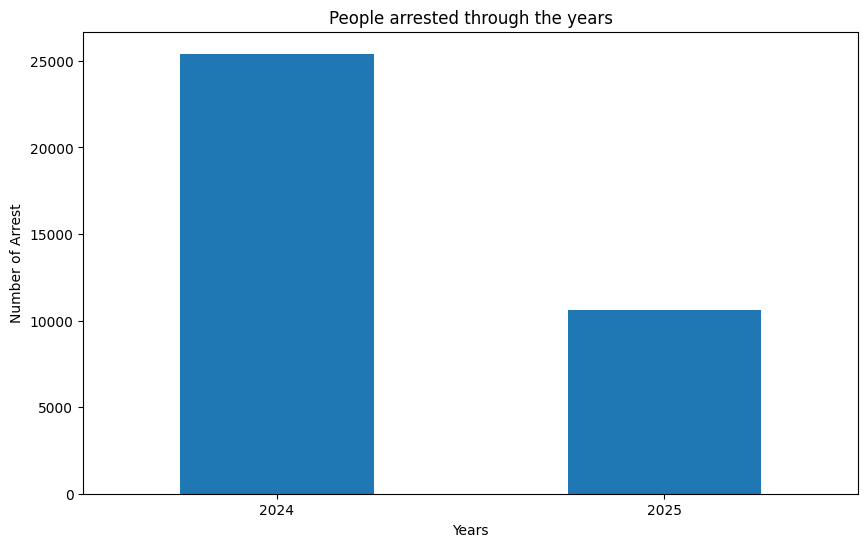

In [24]:
arrested_crimes.plot(kind="bar", figsize=(10,6))
plt.title("People arrested through the years")
plt.xlabel("Years")
plt.ylabel("Number of Arrest")
plt.xticks(rotation=0, ha="center")
plt.show()

<h1>Insights:</h1>
<ul>
    <li>1. There where more crimes recorded in the year 2024 having 25,417 arrest compared to 2025 with only 10,585 arrest</li>
    <li>2. The year 2025 has not yet ended, the total number of crimes may still increase as the year progress</li>
</ul>
<hr>

<h1></h1>
<h1>Let's focus on the year 2024</h1>
<h1></h1>
<hr>

# In the year 2024, what month has the highest arrest rate? 

In [25]:
crimes_2024 = Chicago_Crimes[Chicago_Crimes["Year"] == 2024]

In [30]:
arrested_crimes_2024 = crimes_2024[crimes_2024["Arrest"] == True].groupby("Month").size()
arrested_crimes_2024

Month
1      749
2      847
3      851
4     2376
5     2691
6     2570
7     2763
8     2443
9     2502
10    2607
11    2446
12    2572
dtype: int64

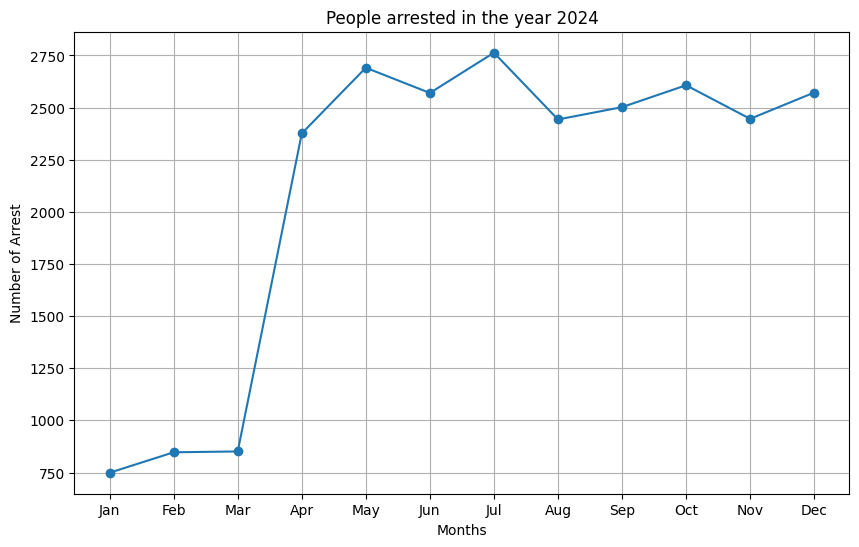

In [27]:
arrested_crimes_2024.plot(kind="line", marker="o", figsize=(10,6))
plt.title("People arrested in the year 2024")
plt.xlabel("Months")
plt.ylabel("Number of Arrest")
plt.xticks(range(1, 13), ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], rotation=0, ha="center")
plt.grid(True)
plt.show()

<h1>Insights:</h1>
<ul>
    <li>1. In March, the number of arrests began to rise, continued to April and showed steady growth</li>
    <li>2. July recorded the highest number of arrest and began to drop in August</li>
    <li>3. From August to October, The number of arrest continued to increase again, before dropping in November then rising again in December</li>
</ul>

<hr>

# What are the types of crimes commited in the year 2024?

In [31]:
crime_types_2024 = Chicago_Crimes[Chicago_Crimes["Year"] == 2024].groupby("Primary Type").size()
crime_types_2024

Primary Type
ARSON                                  352
ASSAULT                              17298
BATTERY                              34052
BURGLARY                              6483
CONCEALED CARRY LICENSE VIOLATION      157
CRIMINAL DAMAGE                      20869
CRIMINAL SEXUAL ASSAULT               1155
CRIMINAL TRESPASS                     3621
DECEPTIVE PRACTICE                   11082
GAMBLING                                18
HOMICIDE                               454
HUMAN TRAFFICKING                       18
INTERFERENCE WITH PUBLIC OFFICER       506
INTIMIDATION                           114
KIDNAPPING                              77
LIQUOR LAW VIOLATION                   136
MOTOR VEHICLE THEFT                  15422
NARCOTICS                             4114
NON-CRIMINAL                             2
OBSCENITY                               37
OFFENSE INVOLVING CHILDREN            1166
OTHER NARCOTIC VIOLATION                 4
OTHER OFFENSE                        1200

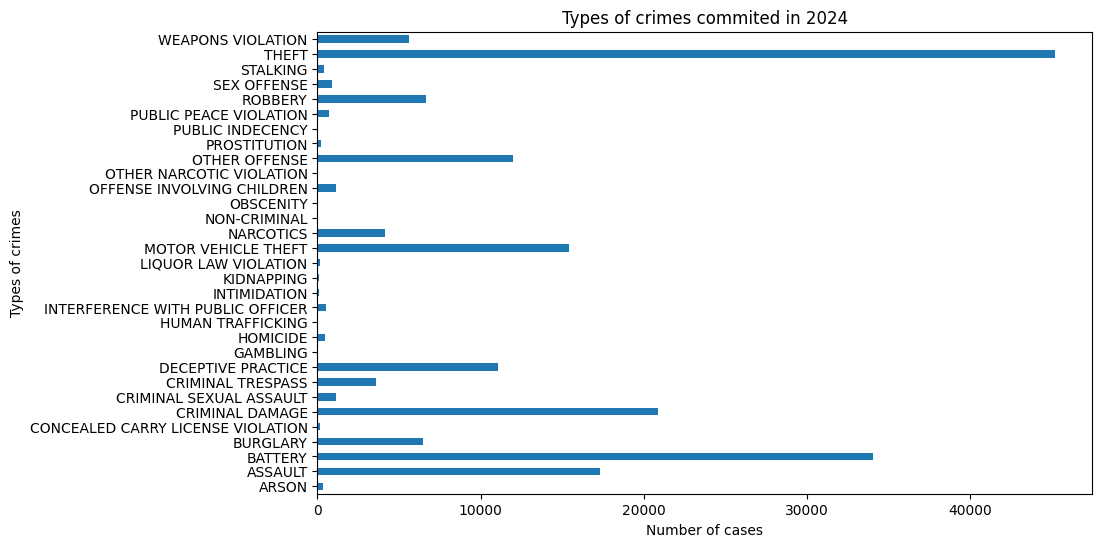

In [29]:
crime_types_2024.plot(kind="barh", figsize=(10,6))
plt.title("Types of crimes commited in 2024")
plt.xlabel("Number of cases")
plt.ylabel("Types of crimes")
plt.xticks(rotation=0, ha="center")
plt.show()

# Since we know theft is the highest, lest remove it for now 

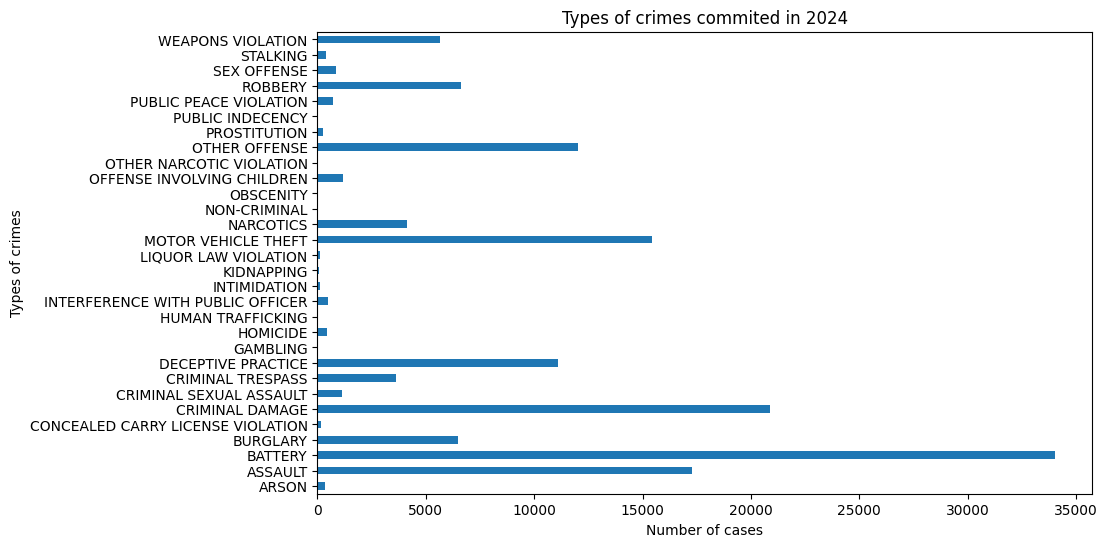

In [29]:
crime_types_2024 = crime_types_2024.drop("THEFT")

crime_types_2024.plot(kind="barh", figsize=(10,6))
plt.title("Types of crimes commited in 2024")
plt.xlabel("Number of cases")
plt.ylabel("Types of crimes")
plt.xticks(rotation=0, ha="center")
plt.show()

<h1>Insights:</h1>
<ul>
    <li>1. Theft has the highest number of cases with 45,239 in 2024, followed by battery with 34,052 cases</li>
    <li>2. Criminal damage ranked third with 20,869 cases among the common crimes</li>
    <li>3. Assult rankend at forth with 17,298 cases</li>
    <li>4. Motor vehicle theft ranked fifth with 15,422 cases</li>
</ul>

<hr>

# For the top 5 crimes commited on 2024, how many cases led to arrest and how many did not?

In [30]:
top5_crime_types_2024 = crime_types_2024.sort_values(ascending=False).head(5)

In [31]:
top5_types = top5_crime_types_2024.index

In [32]:
top5_crimes = Chicago_Crimes[(Chicago_Crimes["Year"] == 2024) & (Chicago_Crimes["Primary Type"].isin(top5_types))]

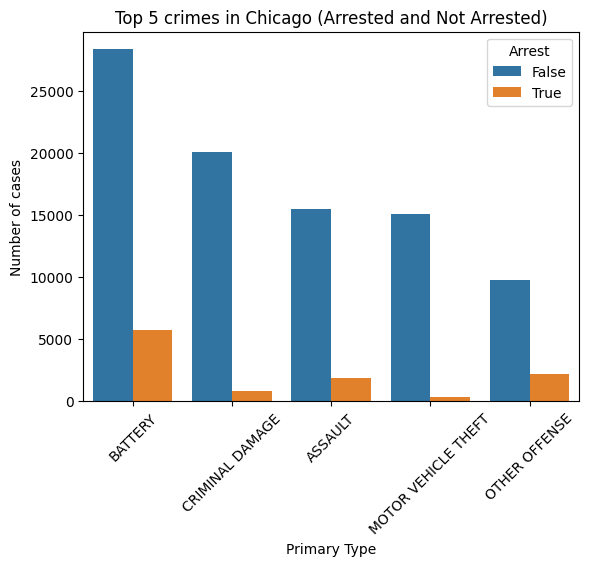

In [33]:
sns.countplot(
    x='Primary Type',
    hue='Arrest',
    data=top5_crimes,
    order=top5_types, # ginamit ko para yung top 5 lang lumabas
)
plt.title("Top 5 crimes in Chicago (Arrested and Not Arrested)")
plt.xticks(rotation=45)
plt.ylabel("Number of cases")
plt.show()

<h1>Insights:</h1>
<ul>
    <li>1. Although theft has the highest number of cases in total, its arrest rate is lower comapred to battery</li>
    <li>2. Battery has the highest number of arrest, even though it ranked second in total</li>
    <li>3. Assualt has the third place when it come to the number of arrest, even higher than criminal damage and motor vehicle theft</li>
</ul>

<hr>
<h1></h1>
<h1>Now, let's focus on both 2024 and 2025</h1>
<h1></h1>
<hr>

<h1>What are the top 10 locations where crimes to occur?</h1>

In [32]:
top10_crime_loc = Chicago_Crimes["Location Description"].value_counts().head(10).sort_values(ascending=False)
top10_crime_loc

Location Description
STREET                                    66897
APARTMENT                                 47787
RESIDENCE                                 29776
SIDEWALK                                  13265
SMALL RETAIL STORE                         9858
PARKING LOT / GARAGE (NON RESIDENTIAL)     8350
RESTAURANT                                 6094
DEPARTMENT STORE                           5768
ALLEY                                      5695
OTHER (SPECIFY)                            4072
Name: count, dtype: int64

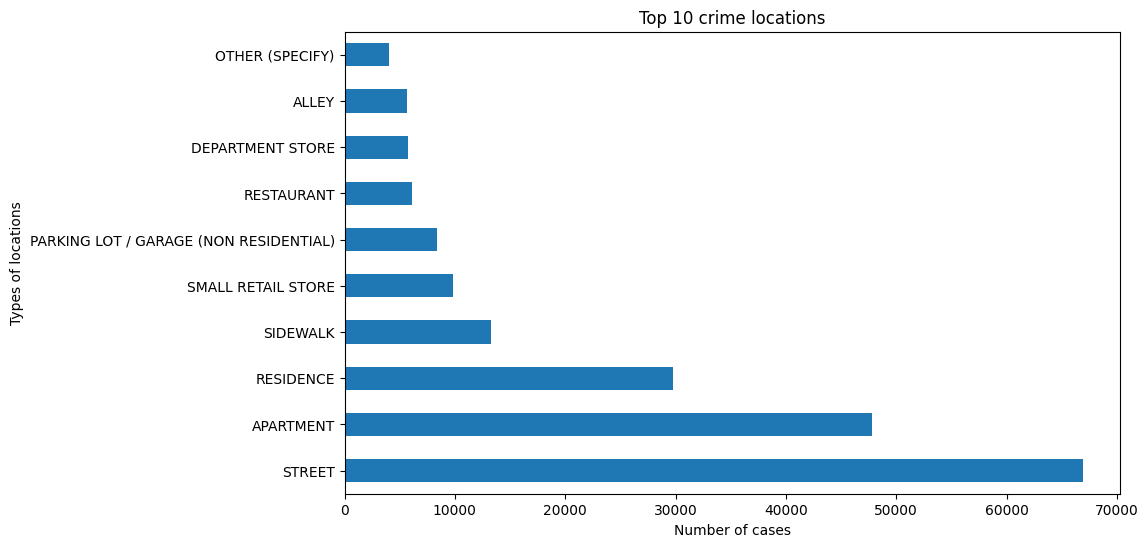

In [35]:
top10_crime_loc.plot(kind="barh", figsize=(10,6))
plt.title("Top 10 crime locations")
plt.xlabel("Number of cases")
plt.ylabel("Types of locations")
plt.xticks(rotation=0, ha="center")
plt.show()

<h1>Insights:</h1>
<ul>
    <li>1. Streets has the highest number of crimes to happen with a number of 66,897 cases, followed by apartment having 47,787 cases</li>
    <li>2. Residence has thrid most number of cases, having a total sum of 29,776</li>
    <li>3. Sidewalk came in at forth with 13,265 cases</li>
</ul>

<hr>

<h1>Crimes that occured in the morning compared to those at night in these locations: Streets, Apartment and Residence?</h1>

In [53]:
streets = Chicago_Crimes[Chicago_Crimes["Location Description"] == "STREET"]
appartment = Chicago_Crimes[Chicago_Crimes["Location Description"] == "APARTMENT"]
residence = Chicago_Crimes[Chicago_Crimes["Location Description"] == "RESIDENCE"]

In [56]:
street_am_and_pm = streets["AM_PM"].value_counts()
apartment_am_and_pm = appartment["AM_PM"].value_counts()
residence_am_and_pm = residence["AM_PM"].value_counts()

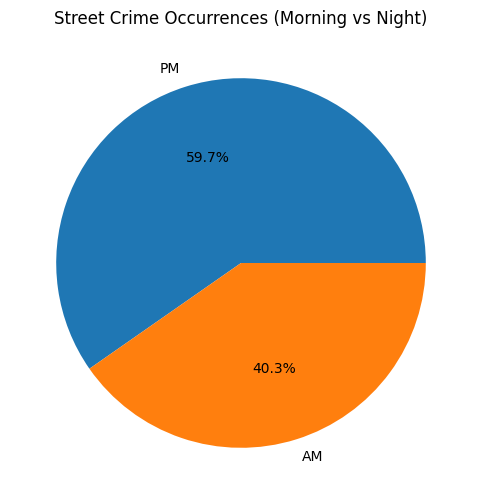

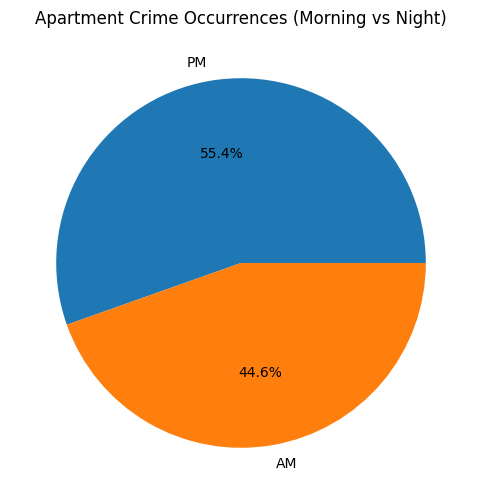

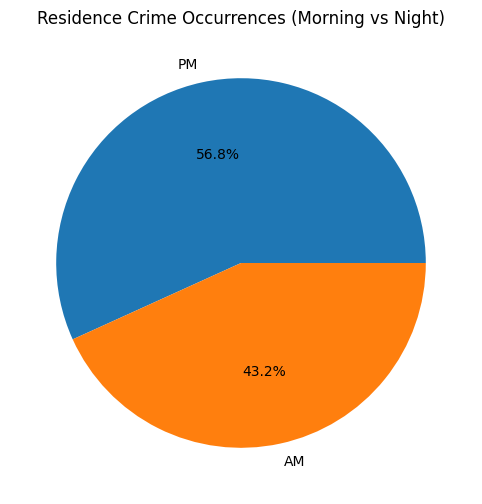

In [61]:
street_am_and_pm.plot(kind="pie", figsize=(10,6), autopct='%1.1f%%',)
plt.title("Street Crime Occurrences (Morning vs Night)")
plt.xticks(rotation=0, ha="center")
plt.ylabel("")
plt.show()

apartment_am_and_pm.plot(kind="pie", figsize=(10,6), autopct='%1.1f%%',)
plt.title("Apartment Crime Occurrences (Morning vs Night)")
plt.xticks(rotation=0, ha="center")
plt.ylabel("")
plt.show()

residence_am_and_pm.plot(kind="pie", figsize=(10,6), autopct='%1.1f%%',)
plt.title("Residence Crime Occurrences (Morning vs Night)")
plt.xticks(rotation=0, ha="center")
plt.ylabel("")
plt.show()

<h1>Insights:</h1>
<ul>
    <li>1. On streets, 59.7% of crimes happened at night, compared to 40.3% during the day.</li>
    <li>2. In apartments, 55.4% of crimes occurred at night, while 44.6% happened during the day.</li>
    <li>3. In residences, 56.8% of crimes took place at night, compared to 43.2% in the daytime.</li>
    <li>4. all have one thing in common, 55% and above are crimes that occured at night, 44% below are crime that happened during the day</li>
    <li>5. This suggest that nighttime has a higher risk period for crime to occur compared to the day</li>
</ul>

<hr>

<h1>What are the relationships between Chicago's districts, wards, and community areas? How does this affect the distribution of crime? </h1>

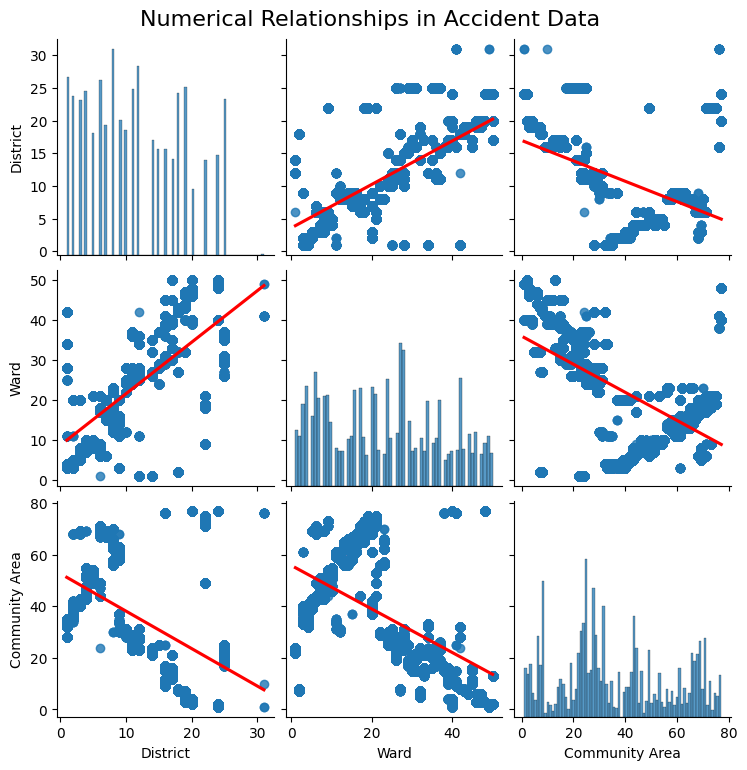

In [64]:
sns.pairplot(
    Chicago_Crimes[['District', 'Ward', 'Community Area']],
    kind='reg',  
    plot_kws={'line_kws': {'color': 'red'}}  # Makes trend lines red
)
plt.suptitle('Crime Relationships by District, Ward, and Community Area', y=1.02, fontsize=16)
plt.show()

<h1>Insights:</h1>
<h1>District Vs Ward</h1>
<ul>
    <li>1. There is a strong positive correlation when it comes to Districts and Wards</li>
    <li>2. This means that as the number Districts increase,the number of Wards also increases</li>
    <li>3. this states that both administrative boundaries within Chicago often overlap geographically.</li>
</ul>
<h1>District Vs Community Area</h1>
<ul>
    <li>1. There is a negative correlation when it comes to Districts and Community Area</li>
    <li>2. This means that as the number District increase, Community Area decrease</li>
    <li>3. this suggest that there a certain higher number of districts that are tied to a specific lower number of Community areas</li>
</ul>
<h1>Ward Vs Community Area</h1>
<ul>
    <li>1. There is negative correlation when it comes to Ward and Community Area</li>
    <li>2. This means that as the number Wards increase, Community Area dencreases</li>
    <li>3. this means that there are Wards  concentrated in specific community areas rather than being spread out.</li>
</ul>
<h1>Other Insights:</h1>
<ul>
    <li>1. This suggest that crime are not evenly distributed. There are certain districts, wards, and community areas that are more prone to crime</li>
    <li>2. District and ward bounderies are closely linked together making it a positive corelation</li>
    <li>3. Community areas does not line up with Districts and Wards, resulting to a negative corelation</li>
</ul>

<hr>

<h1>Which type of crime has the highest domestic rate?</h1>

In [81]:
domestic_rate = Chicago_Crimes.groupby('Primary Type')['Domestic'].mean().sort_values(ascending=False).head(10)

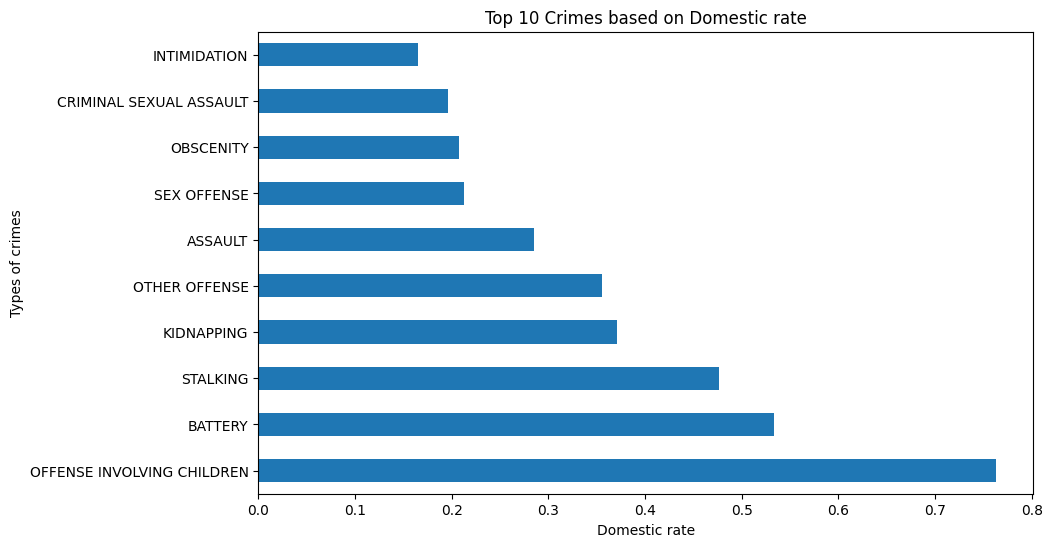

In [84]:
domestic_rate.plot(kind="barh", figsize=(10,6))
plt.title("Top 10 Crimes based on Domestic rate")
plt.xlabel("Domestic rate")
plt.ylabel("Types of crimes")
plt.xticks(rotation=0, ha="center")
plt.show()

<h1>Insights:</h1>
<ul>
    <li>Crimes involving children had the highest domestic rate, showing how often these incidents happen at home.</li>
    <li>Battery comes next, which points to fights and physical violence within families.</li>
    <li>Stalking also appears, meaning some cases of harassment happen within close or family relationships.</li>
</ul>